In [1]:
import sys
import os
import matplotlib.pyplot as plt

# Add the src directory to the path. TEMPORARY FIX
sys.path.append(os.path.abspath(os.path.join(os.getcwd(), "../../..")))

from models.attention_unet.attention_unet import Attention_UNet
from src.models.data_management.cnn_formes import CNNFormes
from src.data_processing.dataset_loader import CoastData
from src.models.data_management.data_loader import DataLoaderManager

import cv2

/opt/conda/lib/python3.10/site-packages/albumentations/__init__.py:28: UserWarning: A new version of Albumentations is available: '2.0.5' (you have '2.0.4'). Upgrade using: pip install -U albumentations. To disable automatic update checks, set the environment variable NO_ALBUMENTATIONS_UPDATE to 1.
  check_for_updates()


In [2]:
# Load the data to split it and save it to a dict
path = os.path.abspath(os.path.join(os.getcwd(), "../../../data/patchify_shoreline/"))
# data = CoastData(data_path=path)

# data_split = data.split_data()

In [3]:
model = Attention_UNet(num_classes=1, experiment_name="test_experiments", use_mlflow=True)

In [4]:
# Load the data to the model
data = model.load_data(path, CNNFormes)

In [5]:
# Total non-shoreline pixels:  1155193552
# Total shoreline pixels:  4269360
# Total pixels:  1159462912
# Shoreline percentage:  0.3682187636890968

total_pixels = 1159462912
shoreline_pixels = 4269360

# Calculate the class weight
weight = total_pixels / shoreline_pixels

print(weight)

271.577686585343


In [6]:
artifact_path = os.path.abspath(os.path.join(path, "../../artifacts/"))
print(artifact_path)
# Train the model
model.train(epochs=100, loss_function_name="BCEWithLogitsLoss", weight=weight, artifact_path=artifact_path, run_name = "binary_attention")

/srv/Shoreline-extraction/artifacts
Creating folders for the artifacts at /srv/Shoreline-extraction/artifacts/2025-03-24-10-58-30_binary_attention
Epoch 1/100
train metrics: 
	train_loss: 0.902194837216408
	train_accuracy: 0.7142550945281982
	train_f1_score: 0.021487386897206306
	train_precision: 0.01088079996407032
	train_recall: 0.8526322841644287
	train_confusion_matrix: 
		0.7137 0.2863
		0.1474 0.8526

validation metrics: 
	validation_loss: 0.7839859324882473
	validation_accuracy: 0.8598057627677917
	validation_f1_score: 0.040599700063467026
	validation_precision: 0.020825568586587906
	validation_recall: 0.8041541576385498
	validation_confusion_matrix: 
		0.8600 0.1400
		0.1958 0.8042

Validation loss improved from inf to 0.783986. Saving the model. Early stopping counter: 0/25
Epoch 2/100
train metrics: 
	train_loss: 0.6558971817262711
	train_accuracy: 0.8216767311096191
	train_f1_score: 0.035977523773908615
	train_precision: 0.018353844061493874
	train_recall: 0.9043135643005371

# Predictions

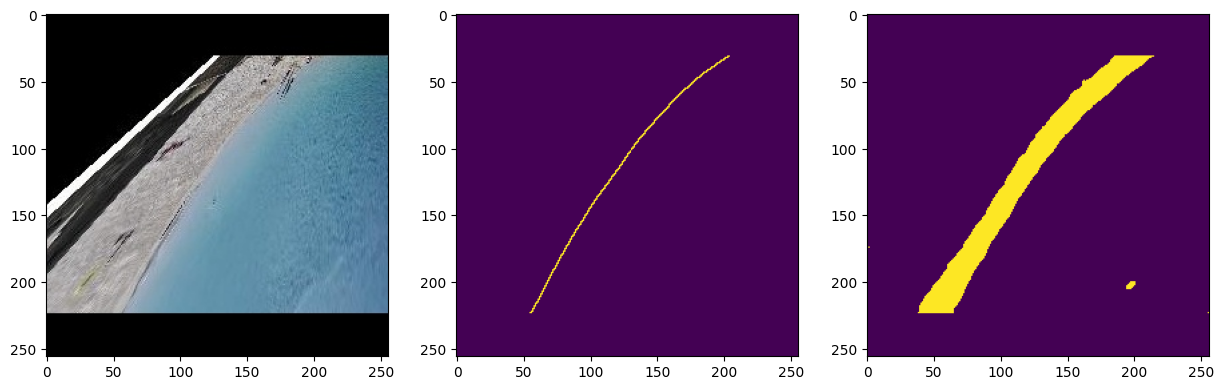

In [12]:
import numpy as np
data = DataLoaderManager.load_data(os.path.abspath(os.path.join(os.getcwd(), "../../../data/patchify_shoreline/")))
index = 1
img_path = data["test"]['images'][index]
mask_path = data["test"]['masks'][index]

artifact_path = os.path.abspath(os.path.join(os.getcwd(), "../../../artifacts/"))
model.load_model(os.path.abspath(os.path.join(artifact_path, "2025-03-24-10-58-30_binary_attention/models/best_model.pth")))

img = cv2.imread(img_path)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

mask = cv2.imread(mask_path, cv2.IMREAD_GRAYSCALE)

pred = model.predict(img_path)

# print(np.unique(mask, return_counts=True))
# print(np.unique(pred, return_counts=True))


fig, ax = plt.subplots(1, 3, figsize=(15, 5))
ax[0].imshow(img)
ax[1].imshow(mask)
ax[2].imshow(pred.cpu().squeeze())

plt.show()